# Question 3

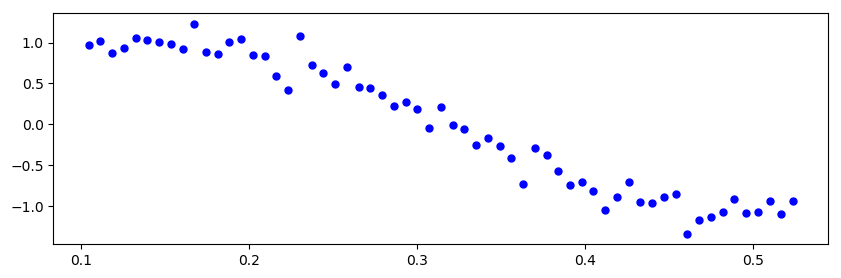

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x1288f97f0>

In [2]:
# Get data
using CSV

# import data set
raw = CSV.read("lasso_data.csv", datarow=1)

x_values = raw[1:end,1];
y_values = raw[1:end,2];

using PyPlot
figure(figsize=(10,3))
plot(x_values,y_values,"b.", markersize=10)

# a)

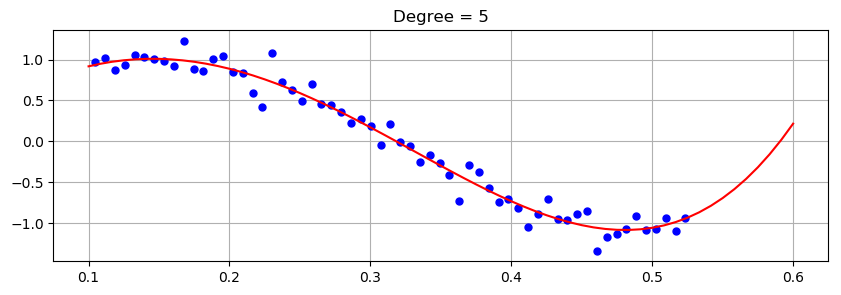

Optimal
0.0010160049969020202
Coefficients: [-10.1365, 126.15, -36.2631, -43.2121, 13.3418, 0.0398447]


In [14]:
# order of polynomial to use
k = 5

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x_values)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x_values[i]^(k+1-j)
    end
end

using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, 1/1000*sum( (y_values - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println("Coefficients: ",uopt)

using PyPlot
npts = length(x_values)
xfine = range(0.1,stop=0.6,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("Degree = 5")
plot( x_values, y_values, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

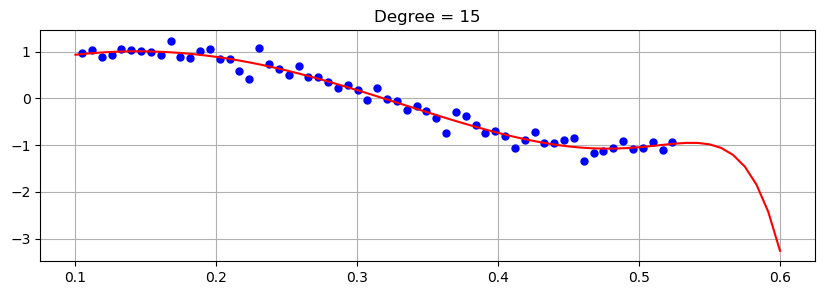

Optimal
0.010137202549861168
Coefficients: [-1.38223e5, 49771.0, 30579.8, 5618.4, -2745.61, -2813.84, -1199.2, -155.127, 184.227, 179.286, 137.024, 3.70869, -42.1837, -26.187, 9.74895, 0.259149]


In [15]:
# order of polynomial to use
k = 15

# fit using a function of the form f(x) = u1 x^k + u2 x^(k-1) + ... + uk x + u{k+1}
n = length(x_values)
A = zeros(n,k+1)
for i = 1:n
    for j = 1:k+1
        A[i,j] = x_values[i]^(k+1-j)
    end
end

using JuMP, Gurobi

m = Model(solver=GurobiSolver(OutputFlag=0))

@variable(m, u[1:k+1])
@objective(m, Min, 1/100*sum( (y_values - A*u).^2 ) )

status = solve(m)
uopt = getvalue(u)
println(status)
println(getobjectivevalue(m))
println("Coefficients: ",uopt)

using PyPlot
npts = length(x_values)
xfine = range(0.1,stop=0.6,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("Degree = 15")
plot( x_values, y_values, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

The magnitudes of the coefficients of both degree are large. The graph looks similar in this interval, but look differently in a larger interval and they are not really smooth.

# b)

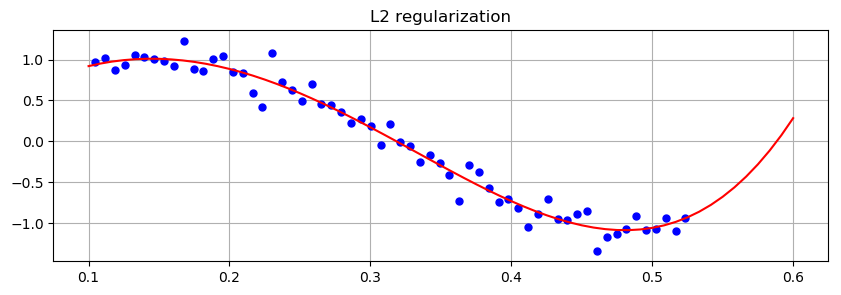

Optimal[-0.594856, -0.976049, -1.55058, -2.35574, -3.35286, -4.29834, -4.51523, -2.59515, 3.70429, 16.4981, 33.9281, 42.0956, 11.5881, -55.0153, 14.5992, -0.00526865]

In [18]:
using JuMP, Gurobi

k = 15

λ = 10^(-6); # Given regularization parameter is small

A = zeros(n,k+1)
for i = 1:length(x_values)
    for j = 1:k+1
        A[i,j] = x_values[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1])

@expression(m, mainObj, sum((y_values - A*u).^2))
@expression(m, R, sum(u.^2)) # L2 regularization

@objective(m, Min, mainObj + λ*R)

print(solve(m))

uopt = getvalue(u)
print(uopt)
using PyPlot
npts = length(x_values)
xfine = range(0.1,stop=0.6,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("L2 regularization")
plot( x_values, y_values, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

It's not hard to see the regularized coefficients are much smaller than non-regularized cases. And it still fits the data well

# c)

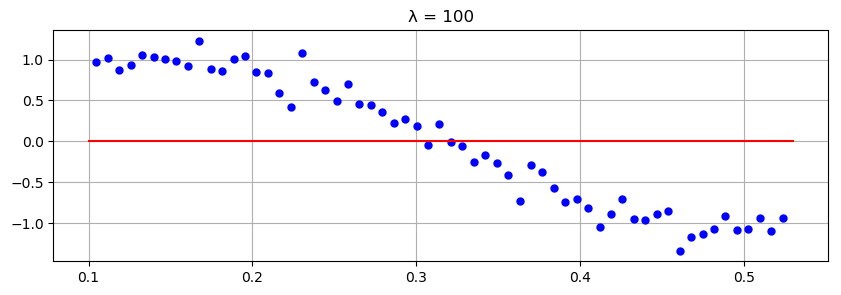

OptimalCoefficient: [-1.27054e-18, -2.47853e-18, -4.9334e-18, -9.94696e-18, -2.02444e-17, -4.15337e-17, -8.58873e-17, -1.79253e-16, -3.78768e-16, -8.18156e-16, -2.06595e-15, -1.031e-14, -3.53731e-14, -1.24383e-13, -4.48412e-13, -1.5232e-13]

In [29]:
using JuMP, Gurobi

k = 15
λ = 100 # Start with a large value
A = zeros(n,k+1)
for i = 1:length(x_values)
    for j = 1:k+1
        A[i,j] = x_values[i]^(k+1-j)
    end
end

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1]) 
@variable(m, t[1:k+1]) # Transformation tricks here since JuMP doesn't support abs
@constraint(m, u .<= t )
@constraint(m, -t .<= u )

@expression(m, mainObj, sum((y_values - A*u).^2))
@expression(m, R, sum(t)) # Lasso regularization.

@objective(m, Min, mainObj + λ*R)

print(solve(m))

uopt = getvalue(u)

print("Coefficient: ",uopt)
using PyPlot
npts = length(x_values)
xfine = range(0.1,stop=0.53,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("λ = 100")
plot( x_values, y_values, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

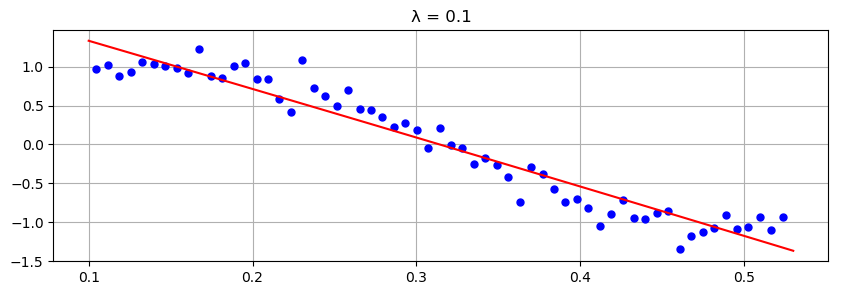

OptimalCoefficient: [2.06899e-14, 3.86615e-14, 7.16169e-14, 1.31193e-13, 2.36724e-13, 4.17866e-13, 7.15267e-13, 1.16883e-12, 1.75957e-12, 2.26674e-12, 1.86601e-12, -1.46442e-12, -1.52318e-11, -0.256189, -6.119, 1.94772]

In [30]:
using JuMP, Gurobi

λ = 0.1 # Try a small value

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1]) 
@variable(m, t[1:k+1])
@constraint(m, u .<= t )
@constraint(m, -t .<= u )

@expression(m, mainObj, sum((y_values - A*u).^2))
@expression(m, R, sum(t)) # Lasso regularization.

@objective(m, Min, mainObj + λ*R)

print(solve(m))

uopt = getvalue(u)

print("Coefficient: ",uopt)
using PyPlot
npts = length(x_values)
xfine = range(0.1,stop=0.53,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("λ = 0.1")
plot( x_values, y_values, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

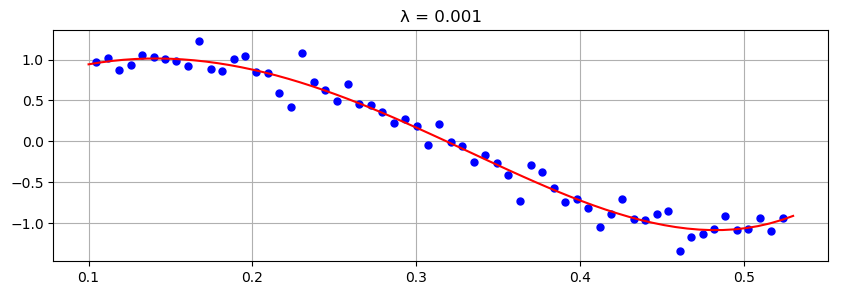

OptimalCoefficient: [2.1198e-10, 4.17644e-10, 8.16748e-10, 1.58243e-9, 3.03081e-9, 5.72896e-9, 1.07112e-8, 2.01372e-8, 4.04992e-8, 1.09222e-7, 41.1858, 50.367, 2.03431e-8, -48.5435, 13.0344, 0.119138]

In [31]:
using JuMP, Gurobi

λ = 0.001 # Try a smaller value

m = Model(solver=GurobiSolver(OutputFlag=0))
@variable(m, u[1:k+1]) 
@variable(m, t[1:k+1])
@constraint(m, u .<= t )
@constraint(m, -t .<= u )

@expression(m, mainObj, sum((y_values - A*u).^2))
@expression(m, R, sum(t)) # Lasso regularization.

@objective(m, Min, mainObj + λ*R)

print(solve(m))

uopt = getvalue(u)

print("Coefficient: ",uopt)
using PyPlot
npts = length(x_values)
xfine = range(0.1,stop=0.53,length=npts)
ffine = ones(npts)
for j = 1:k
    ffine = [ffine.*xfine ones(npts)]
end
yfine = ffine * uopt
figure(figsize=(10,3))
title("λ = 0.001")
plot( x_values, y_values, "b.", markersize=10)
plot( xfine, yfine, "r-")
grid()

While λ is smaller, the regularization works better and gives better solution.